Iteration 0, Cost: 76.2560
Iteration 100, Cost: 0.7727
Iteration 200, Cost: 0.7724
Iteration 300, Cost: 0.7724
Iteration 400, Cost: 0.7724
Iteration 500, Cost: 0.7724
Iteration 600, Cost: 0.7724
Iteration 700, Cost: 0.7724
Iteration 800, Cost: 0.7724
Iteration 900, Cost: 0.7724


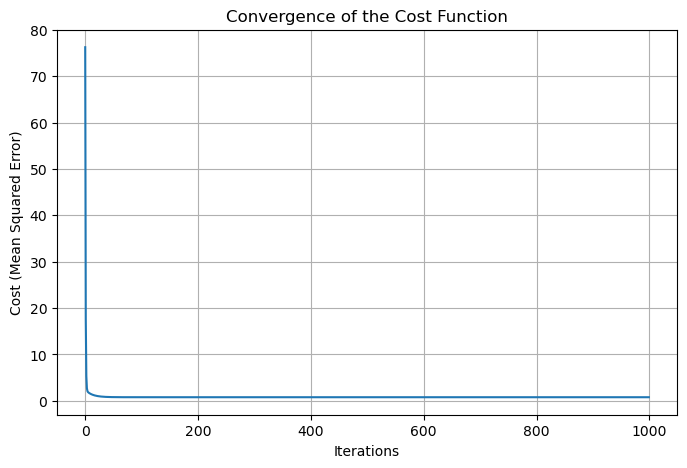

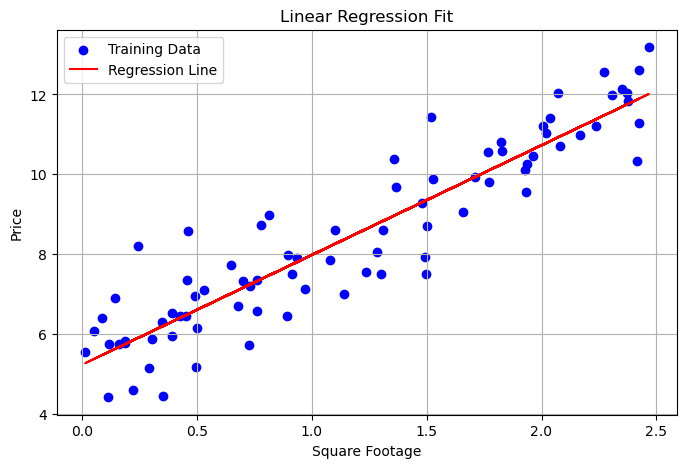

Mean Squared Error on Test Data: 0.9755


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate Mean Squared Error (MSE) cost

def mean_squared_error(y_true, y_pred):
    """
    Compute the Mean Squared Error.
    :param y_true: True target values.
    :param y_pred: Predicted target values.
    :return: MSE cost.
    """
    return np.mean((y_true - y_pred) ** 2)

# Gradient Descent Linear Regression Implementation
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        """
        Initialize the Linear Regression model.
        :param learning_rate: Learning rate for gradient descent.
        :param n_iterations: Number of iterations for gradient descent.
        """
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.cost_history = []

    def fit(self, X, y):
        """
        Fit the model to the training data using gradient descent.
        :param X: Input features (numpy array).
        :param y: Target values (numpy array).
        """
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.n_iterations):
            # Predict the outputs
            y_pred = np.dot(X, self.weights) + self.bias

            # Calculate gradients
            dw = -(2 / n_samples) * np.dot(X.T, (y - y_pred))
            db = -(2 / n_samples) * np.sum(y - y_pred)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Calculate and store the cost
            cost = mean_squared_error(y, y_pred)
            self.cost_history.append(cost)

            # Debug: Print cost every 100 iterations
            if i % 100 == 0:
                print(f"Iteration {i}, Cost: {cost:.4f}")

    def predict(self, X):
        """
        Predict using the linear model.
        :param X: Input features (numpy array).
        :return: Predicted values (numpy array).
        """
        return np.dot(X, self.weights) + self.bias

# Generate a simple regression dataset (house prices vs. square footage)
np.random.seed(42)
X = 2.5 * np.random.rand(100, 1)  # Square footage (scaled)
y = 5 + 3 * X[:, 0] + np.random.randn(100)  # Prices with some noise
X = X.reshape(-1, 1)

# Split dataset into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train the model using gradient descent
model = LinearRegressionGD(learning_rate=0.1, n_iterations=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Plot the convergence of the cost function
plt.figure(figsize=(8, 5))
plt.plot(model.cost_history)
plt.title("Convergence of the Cost Function")
plt.xlabel("Iterations")
plt.ylabel("Cost (Mean Squared Error)")
plt.grid(True)
plt.show()

# Plot the regression line on the training data
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.plot(X_train, model.predict(X_train), color="red", label="Regression Line")
plt.title("Linear Regression Fit")
plt.xlabel("Square Footage")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model
test_mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Data: {test_mse:.4f}")
